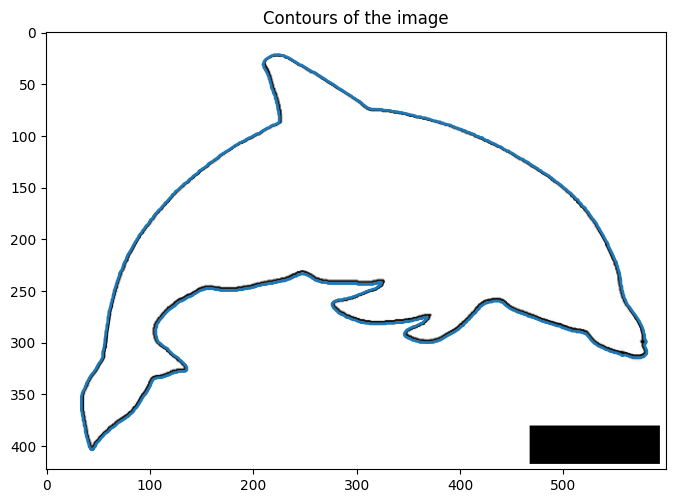

In [1]:
from skimage import io, measure, color
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image_path = "dolphin.png"
image = io.imread(image_path)

image = image[:, :, :3]
# Convert to grayscale
gray_image = color.rgb2gray(image)

# Find contours at a constant value of 0.8
contours = measure.find_contours(gray_image, level=0.8)

# Extract the largest contour
largest_contour = max(contours, key=len)

# Plot the contours
plt.figure(figsize=(8, 8))
plt.imshow(gray_image, cmap="gray")
contour = contours[0]
plt.plot(contour[:, 1], contour[:, 0], linewidth=2)

plt.title("Contours of the image")
plt.axis("image")
plt.show()

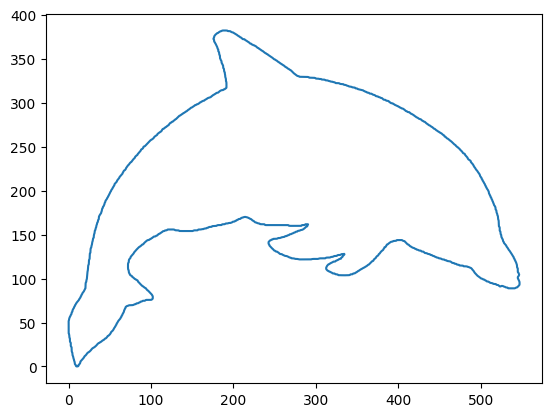

In [2]:
dolphin = contour.copy()
dolphin[:, 0] = contour[:, 1]
dolphin[:, 1] = -contour[:, 0]
min_xy = np.min(dolphin, axis=0)
dolphin -= min_xy
plt.plot(dolphin[:, 0], dolphin[:, 1])
plt.show()

In [3]:
w, h = 344, 205
a, b = np.max(dolphin, axis=0) - np.min(dolphin, axis=0)

In [4]:
scalr_x = 350 / a
scalr_y = 210 / b
dolphin[:, 0] *= scalr_x
dolphin[:, 1] *= scalr_y

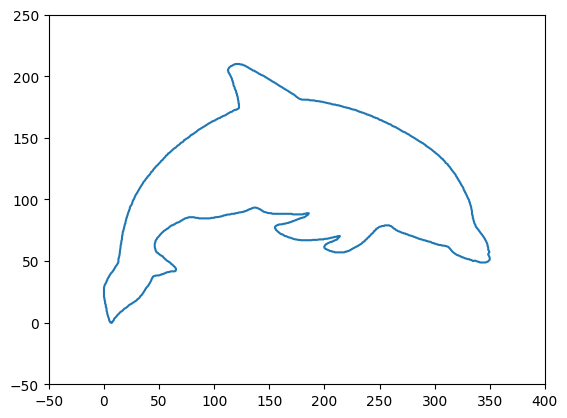

In [5]:
plt.plot(dolphin[:, 0], dolphin[:, 1])
plt.xlim(-50, 400)
plt.ylim(-50, 250)
plt.show()

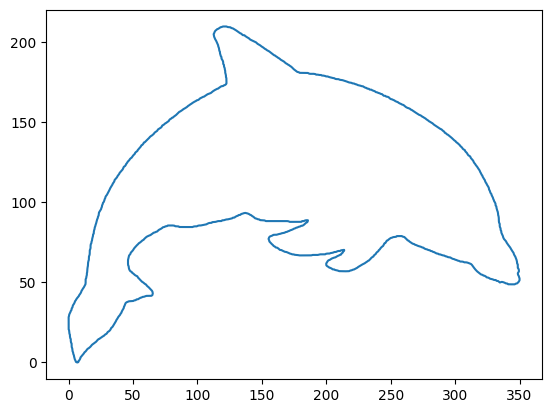

In [6]:
# downsample from 2359 to 100 points
dolphin = dolphin[::2]
plt.plot(dolphin[:, 0], dolphin[:, 1])
plt.show()

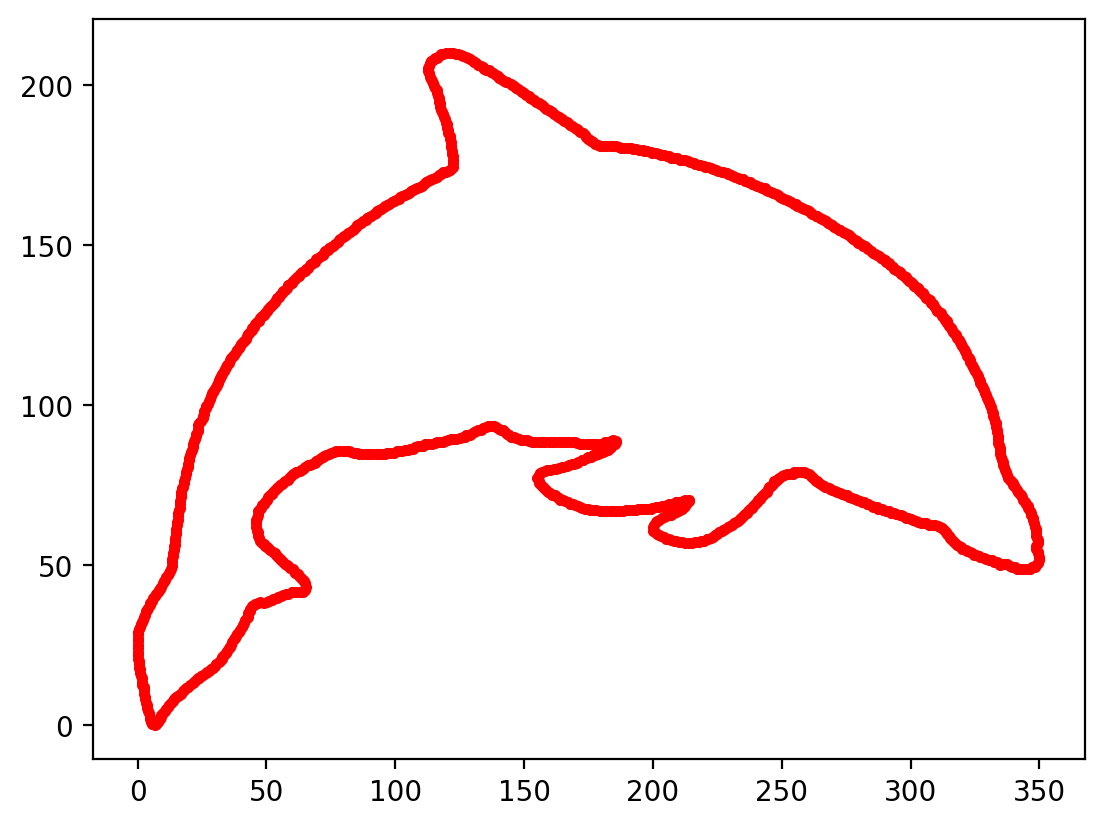

In [7]:
%config InlineBackend.figure_format='retina'
plt.plot(dolphin[:, 0], dolphin[:, 1],'b-')
plt.plot(dolphin[:, 0], dolphin[:, 1],'.r')
plt.show()

In [8]:
# save the dolphin
np.savetxt("dolphin.txt", dolphin, fmt="%.6f", delimiter="\t")